In [1]:
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state= 15)

In [6]:
x_train.shape

(160, 3)

In [7]:
x_test.shape

(40, 3)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.values, y_train)

LinearRegression()

In [9]:
test = [[150,150,100]]

pred = model.predict(test)
print('Prediction = ', pred[0])

Prediction =  28.461228109264283


In [10]:
b0 = model.intercept_

In [11]:
b = model.coef_
b1 = model.coef_[0]
b2 = model.coef_[1]
b3 = model.coef_[2]

b

array([0.05579385, 0.10182203, 0.00415545])

In [12]:
print(f'Y = {b0} + {b1} TV + {b2} Radio + {b3} Newspaper')

Y = 4.403301064986737 + 0.055793851818161926 TV + 0.10182202992020355 Radio + 0.0041554478352272385 Newspaper


In [13]:
y_pred = model.predict(x_test.values)
y_pred

array([ 9.48014798,  9.74034749,  9.578992  ,  7.61412598,  8.9161981 ,
       18.10349948, 23.80639906,  8.45058944,  9.52481395, 14.02638709,
        5.91173779,  9.33890342, 21.63371306, 18.5788581 , 21.3716781 ,
       15.41198661, 15.90374543, 12.37618248, 20.85725333, 24.77805334,
        8.8089096 , 23.77526226,  9.57401827, 18.23968951, 18.18553619,
       13.03492642, 23.14573163,  9.20376162, 15.20778442, 18.26570686,
        6.28886805, 21.79104406,  9.8413285 , 12.11724872, 19.19663564,
       10.32455902, 11.52696495, 13.73223973, 22.41892146,  7.04160649])

<Axes: xlabel='Sales'>

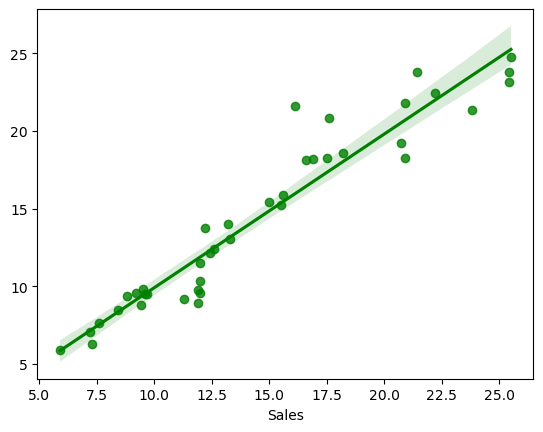

In [14]:
sns.regplot(x = y_test, y = y_pred, color= 'green')

In [15]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('mae = ', mae.round(2))
print('mse = ', mse.round(2))
print('rmse = ', rmse.round(2))

mae =  1.17
mse =  2.71
rmse =  1.65
